In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('../input/avocado-prices/avocado.csv') 
df.head(8)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
if df.isnull().sum().any() == False:
    print("there are no missing values")
else:
    print("there are something wrong here")


there are no missing values


In [5]:
df = df.drop(["Unnamed: 0"], axis = 1)

# Checking for duplicate rows
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  0


In [6]:
df["month"] = np.nan
months_dict = {"Jan" : "01",
               "Feb" : "02", 
               "Mar" : "03",
               "Apr" : "04",
               "May" : "05",
               "Jun" : "06",
               "Jul" : "07",
               "Aug" : "08",
               "Sep" : "09",
               "Oct" : "10",
               "Nov" : "11",
               "Dec" : "12"}

months_key_list = list(months_dict.keys())
months_value_list = list(months_dict.values())

for index in range(df.shape[0]):
    date = df.loc[index, "Date"]
    month = date.split("-")[1]
    i = months_value_list.index(month)
    df.loc[index, "month"] = months_key_list[i]
    
# Checking if the values are correct
df["month"].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [7]:
df = df.drop(["Date"], axis = 1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [9]:
df.describe(include = "O").T

,count,unique,top,freq
type,18249,2,conventional,9126
region,18249,54,Midsouth,338
month,18249,12,Jan,1944


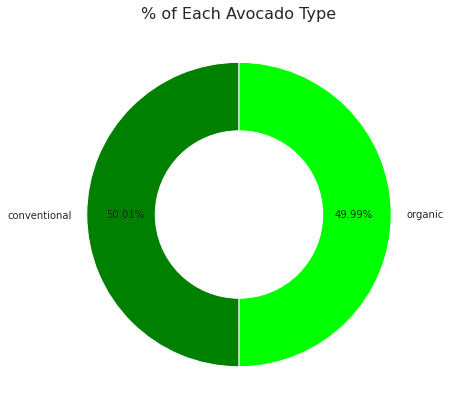

In [10]:
sns.set_style("whitegrid")

df_type = df["type"].value_counts()

plt.figure(figsize = (7, 7))
plt.pie(data = df_type, x = df_type.values, labels = df_type.index, autopct = "%.2f%%", pctdistance = 0.75, startangle = 90, colors = ["green", "lime"])
circle = plt.Circle(xy = (0, 0), radius = 0.55, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("% of Each Avocado Type", size = 16)
plt.show()

In [11]:
print("total number of conventinal avocados: {0}\ntotal number of organic avocados: {1}".format(df["type"].value_counts()["conventional"], df["type"].value_counts()["organic"]))

total number of conventinal avocados: 9126
total number of organic avocados: 9123


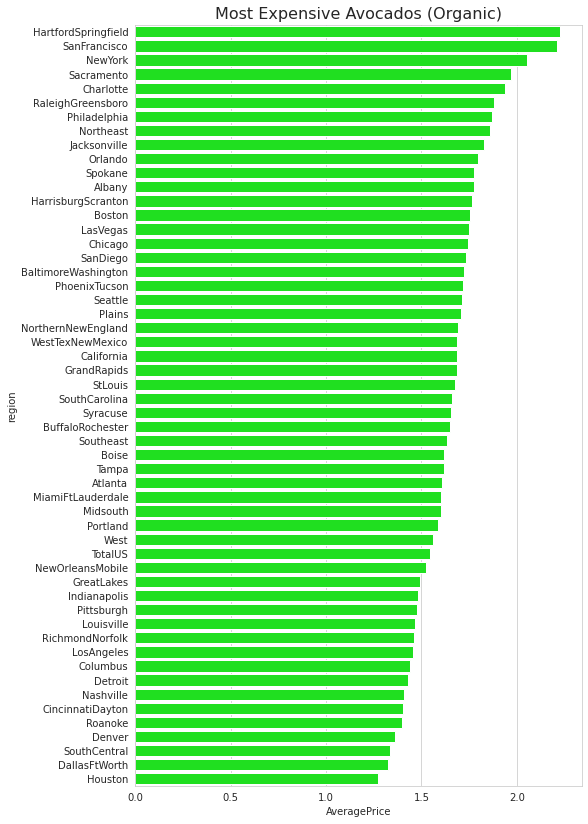

In [12]:
df_organic = df.loc[df["type"] == "organic"].copy()
df_region = df_organic.groupby(["region"])[["AveragePrice"]].mean().sort_values(by = "AveragePrice", ascending = False).copy()

plt.figure(figsize = (8, 14))
sns.barplot(data = df_region, x = "AveragePrice", y = df_region.index, color = "lime")
plt.title("Most Expensive Avocados (Organic)", size = 16)
plt.show()

In [13]:
df_visualization = df.loc[df["year"] != "2018"].copy()

# Putting months in order for a better visualization
df_visualization["month"] = pd.Categorical(df_visualization["month"], categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered = True)

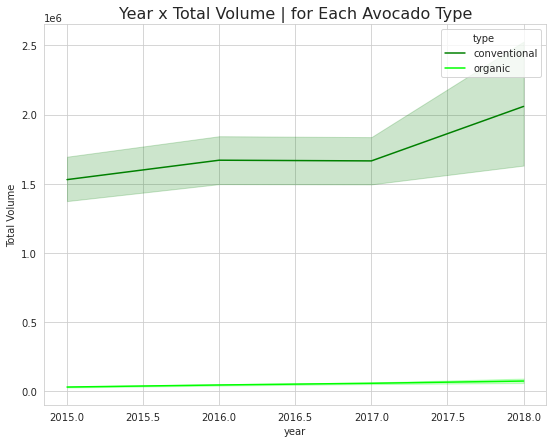

In [14]:
plt.figure(figsize = (9, 7))
sns.lineplot(data = df_visualization, x = "year", y = "Total Volume", hue = "type", palette = ["green", "lime"])
plt.title("Year x Total Volume | for Each Avocado Type", size = 16)
plt.show()